In [37]:
!pip3 install --upgrade pandas

     |████████████████████████████████| 11.3 MB 5.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt 

# Load Data

In [2]:
customer = pd.read_csv('https://raw.githubusercontent.com/chriszhangpodo/discretizedata/main/customer_churn/customer.csv')
sevices = pd.read_csv('https://raw.githubusercontent.com/chriszhangpodo/discretizedata/main/customer_churn/services.csv')
transaction = pd.read_csv('https://raw.githubusercontent.com/chriszhangpodo/discretizedata/main/customer_churn/transactions.csv')
scheduled_service = pd.read_csv('https://raw.githubusercontent.com/chriszhangpodo/discretizedata/main/customer_churn/scheduled_services.csv')

### Data statistic check

In [5]:
def missingdf(df):
  percent_missing = df.isnull().sum() * 100 / len(df)
  missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
  return missing_value_df

In [6]:
missingdf(customer)

,column_name,percent_missing
Account_ANZSIC,Account_ANZSIC,23.3
WPF_Flag,WPF_Flag,0.0
LPF_Flag,LPF_Flag,0.0
OCF_Flag,OCF_Flag,0.0
PIF_Flag,PIF_Flag,0.0
Lead_Source,Lead_Source,0.0
Payment_Terms,Payment_Terms,8.6
EVF_Flag,EVF_Flag,0.0
Weekend_Surcharge_Flag,Weekend_Surcharge_Flag,0.0
Account_Number,Account_Number,0.0


In [7]:
missingdf(sevices)

,column_name,percent_missing
Category_Code,Category_Code,0.000000
Category_Description,Category_Description,0.000000
Service_Code,Service_Code,0.000000
Service_Code_Description,Service_Code_Description,0.000000
Service_Code_Unit_of_Measure,Service_Code_Unit_of_Measure,0.000000
Container_Size,Container_Size,0.000000
Is_Rental_Flag,Is_Rental_Flag,0.000000
Is_Service_Flag,Is_Service_Flag,0.000000
Inscope_WP_Flag,Inscope_WP_Flag,0.000000
Inscope_OC_Flag,Inscope_OC_Flag,0.000000


In [8]:
missingdf(transaction)

,column_name,percent_missing
SK_Charge,SK_Charge,33.691557
SK_Customer,SK_Customer,0.000000
SK_Service,SK_Service,0.000000
SK_Transaction,SK_Transaction,0.000000
Transaction_Amount,Transaction_Amount,0.000000
Transaction_Amount_Positive,Transaction_Amount_Positive,0.000000
Transaction_Amount_Negative,Transaction_Amount_Negative,0.000000
Transaction_Date,Transaction_Date,5.253574
Transaction_ID,Transaction_ID,0.000000
Transaction_Processing_Period,Transaction_Processing_Period,0.000000


In [9]:
missingdf(scheduled_service)

,column_name,percent_missing
Weight_Density,Weight_Density,47.307132
Charge_Cycle,Charge_Cycle,0.000000
Charge_Description,Charge_Description,0.000000
Charge_ID,Charge_ID,0.000000
Contract_Start_Date,Contract_Start_Date,0.000000
SK_Contract_Start_Date,SK_Contract_Start_Date,6.331878
SK_Charge,SK_Charge,0.000000
Price,Price,9.679767
SOURCE_SYSTEM,SOURCE_SYSTEM,0.000000
Contract_Stop_Date,Contract_Stop_Date,13.318777


In [14]:
# check if customer and transaction has the same amount
print(len(np.unique(transaction['SK_Customer'],return_counts=False)))
print(len(np.unique(customer['SK_Customer'],return_counts=False)))

# check if customers from transaction are all in customer dataframe
print(len(np.unique(customer[customer['SK_Customer'].isin(np.unique(transaction['SK_Customer'],return_counts=False))]['SK_Customer'])))

884
1000
884


In [16]:
# check if schedule service and transaction has the same amount on sk_charge
print(len(np.unique(transaction['SK_Charge'],return_counts=False)))
print(len(np.unique(scheduled_service['SK_Charge'],return_counts=False)))

# check if sk_charge from transaction are all in schedule service dataframe
print(len(np.unique(scheduled_service[scheduled_service['SK_Charge'].isin(np.unique(transaction['SK_Charge'],return_counts=False))]['SK_Charge'])))

71129
1374
1374


In [17]:
# check if service and transaction has the same amount on SK_Service
print(len(np.unique(transaction['SK_Service'],return_counts=False)))
print(len(np.unique(sevices['SK_Service'],return_counts=False)))

# check if SK_Service from transaction are all in service dataframe
print(len(np.unique(sevices[sevices['SK_Service'].isin(np.unique(transaction['SK_Service'],return_counts=False))]['SK_Service'])))

1957
1957
1957


# Churn Customer

In [3]:
# using transaction processing period as there is no missing value
transaction['trans_date'] = transaction[['Transaction_Processing_Period']].apply(pd.to_datetime)
# change transdate to YYYY-MM format
transaction['trans_m_y'] = transaction['trans_date'].dt.to_period('M')
transaction['SK_Service'] = transaction['SK_Service'].astype('int')
sevices['SK_Service'] = sevices['SK_Service'].astype('int')
transaction = transaction.merge(sevices,on='SK_Service',how='left')

In [4]:
# remove the Transfer Father A/C
transaction = transaction[transaction['SK_Service']!=83903]

In [5]:
print(transaction['trans_date'].min())
print(transaction['trans_date'].max())

2018-07-01 00:00:00
2021-11-01 00:00:00


In [6]:
# create Date Dim table for future joining
date_m = pd.DataFrame(pd.date_range(end = '2021-12-01', periods = 41,freq='M').to_pydatetime(),columns=['year_month'])
date_m['trans_m_y'] = date_m['year_month'].dt.to_period('M')

In [7]:
# using Transaction_Amount_Positive to get rid of the credit for negative transactions 
transaction_month = transaction.groupby(["SK_Customer","trans_m_y"])["Transaction_Amount_Positive"].agg('sum').reset_index()

In [8]:
transaction_month.shape

(13031, 3)

In [9]:
# make the transaction month continuous by cross joining the date dim -- if not, there is no way to calculate moving sum of the revnue over two months
transaction_month = transaction_month.merge(date_m[['trans_m_y']],how='cross')

In [10]:
transaction_month.shape

(534271, 4)

In [11]:
transaction_month[transaction_month['SK_Customer']==277]

,SK_Customer,trans_m_y_x,Transaction_Amount_Positive,trans_m_y_y
0,277,2020-07,1106.599998,2018-07
1,277,2020-07,1106.599998,2018-08
2,277,2020-07,1106.599998,2018-09
3,277,2020-07,1106.599998,2018-10
4,277,2020-07,1106.599998,2018-11
...,...,...,...,...
77,277,2020-10,0.000000,2021-07
78,277,2020-10,0.000000,2021-08
79,277,2020-10,0.000000,2021-09
80,277,2020-10,0.000000,2021-10


In [12]:
# find out the start and end calendar month on each customer
df3 = pd.DataFrame(transaction.groupby('SK_Customer')['trans_m_y'].agg(start='min').reset_index())
df3['end'] = pd.DataFrame(transaction.groupby('SK_Customer')['trans_m_y'].agg(end='max').reset_index()['end'])

In [13]:
df3

,SK_Customer,start,end
0,277,2020-07,2020-10
1,347,2018-07,2018-09
2,774,2018-07,2018-09
3,20002,2019-10,2019-11
4,24646,2018-07,2021-11
...,...,...,...
879,4641542,2019-07,2021-11
880,4641591,2019-07,2020-06
881,4646621,2020-07,2021-11
882,4646681,2020-07,2021-11


In [14]:
# adding start and end for each customer on each transaction, remove the irrelavent date
transaction_month = transaction_month.merge(df3,how='left',on='SK_Customer')
print(transaction_month.shape)
transaction_month = transaction_month[(transaction_month.trans_m_y_y >= transaction_month.start) & (transaction_month.trans_m_y_y <= transaction_month.end)]
print(transaction_month.shape)

(534271, 6)
(362070, 6)


In [16]:
# clean out the duplications on continuous calendar month
transaction_month['trans_amount'] = np.where(transaction_month.trans_m_y_x==transaction_month.trans_m_y_y, transaction_month['Transaction_Amount_Positive'], 0)
transaction_month_final = transaction_month[['SK_Customer','trans_m_y_y','start','end','trans_amount']].drop_duplicates()[['SK_Customer','trans_m_y_y','trans_amount']]
transaction_month_final = pd.DataFrame(transaction_month_final.groupby(['SK_Customer','trans_m_y_y'])['trans_amount'].sum().reset_index())

In [26]:
transaction_month_final

,SK_Customer,trans_m_y_y,trans_amount
0,277,2020-07,1106.599998
1,277,2020-08,0.000000
2,277,2020-09,0.000000
3,277,2020-10,0.000000
4,347,2018-07,406.859999
...,...,...,...
14126,4658569,2019-11,131.559999
14127,4658569,2019-12,120.579998
14128,4658569,2020-01,246.619994
14129,4658569,2020-02,1064.689991


In [27]:
# calculate the moving sum over every two months along the calendar month -- equavlent to amount + coalesce(lag("amount", 1) OVER (ORDER BY "date"), 0)
transaction_month_final_group=pd.DataFrame(transaction_month_final.groupby(['SK_Customer'])['trans_amount'].rolling(min_periods=2,window=2).sum().groupby(level=0).shift(0).reset_index())
transaction_month_final_group.columns=['SK_Customer','level_1','trans_amount_2m']
transaction_month_final_group

,SK_Customer,level_1,trans_amount_2m
0,277,0,NaN
1,277,1,1106.599998
2,277,2,0.000000
3,277,3,0.000000
4,347,4,NaN
...,...,...,...
14126,4658569,14126,263.119997
14127,4658569,14127,252.139997
14128,4658569,14128,367.199993
14129,4658569,14129,1311.309985


In [29]:
# join the moving sum to transaction
transaction_month_final_ = transaction_month_final.join(transaction_month_final_group[['trans_amount_2m']],how='left')
transaction_month_final_

,SK_Customer,trans_m_y_y,trans_amount,trans_amount_2m
0,277,2020-07,1106.599998,NaN
1,277,2020-08,0.000000,1106.599998
2,277,2020-09,0.000000,0.000000
3,277,2020-10,0.000000,0.000000
4,347,2018-07,406.859999,NaN
...,...,...,...,...
14126,4658569,2019-11,131.559999,263.119997
14127,4658569,2019-12,120.579998,252.139997
14128,4658569,2020-01,246.619994,367.199993
14129,4658569,2020-02,1064.689991,1311.309985


In [47]:
# shifting the trans_amount_2m down for calculate the revnue difference on each calendar month
transaction_month_final_1 = transaction_month_final_.groupby(['SK_Customer'])['trans_amount_2m'].shift(1).reset_index()
transaction_month_final_2 = transaction_month_final_.join(transaction_month_final_1,how='left',rsuffix='r')
transaction_month_final_2

,SK_Customer,trans_m_y_y,trans_amount,trans_amount_2m,index,trans_amount_2mr
0,277,2020-07,1106.599998,NaN,0,NaN
1,277,2020-08,0.000000,1106.599998,1,NaN
2,277,2020-09,0.000000,0.000000,2,1106.599998
3,277,2020-10,0.000000,0.000000,3,0.000000
4,347,2018-07,406.859999,NaN,4,NaN
...,...,...,...,...,...,...
14126,4658569,2019-11,131.559999,263.119997,14126,259.379995
14127,4658569,2019-12,120.579998,252.139997,14127,263.119997
14128,4658569,2020-01,246.619994,367.199993,14128,252.139997
14129,4658569,2020-02,1064.689991,1311.309985,14129,367.199993


In [48]:
# calcualte the reduce rate
transaction_month_final_2['reduce_rate'] = (transaction_month_final_2['trans_amount_2m']-transaction_month_final_2['trans_amount_2mr'])/transaction_month_final_2['trans_amount_2mr']

In [49]:
# double check 
transaction_month_final_2[transaction_month_final_2['SK_Customer']==277]

,SK_Customer,trans_m_y_y,trans_amount,trans_amount_2m,index,trans_amount_2mr,reduce_rate
0,277,2020-07,1106.599998,NaN,0,NaN,NaN
1,277,2020-08,0.000000,1106.599998,1,NaN,NaN
2,277,2020-09,0.000000,0.000000,2,1106.599998,-1.0
3,277,2020-10,0.000000,0.000000,3,0.000000,NaN


In [51]:
# find out the churned customer with their calendar month on churn (first churn)
transaction_churn = transaction_month_final_2[transaction_month_final_2['reduce_rate']<=-0.8].groupby(['SK_Customer'])['trans_m_y_y'].min().reset_index()

In [52]:
transaction_churn

,SK_Customer,trans_m_y_y
0,277,2020-09
1,24646,2020-02
2,36252,2019-01
3,47264,2020-10
4,59898,2018-11
...,...,...
176,4561002,2019-12
177,4626838,2019-12
178,4631668,2021-11
179,4634048,2020-05


In [93]:
transaction_churn.to_csv('transaction_churn.csv')

In [53]:
# transactions on churned customers only and adding the churn date
transaction_churn_trans = transaction_month_final.merge(transaction_churn,how='inner',left_on='SK_Customer',right_on='SK_Customer')

In [55]:
#processing the transactions on churned customers

def my_agg(x):
   names = {
       'Sum_amount': x[x['trans_m_y_y_x'] < x['trans_m_y_y_y']]['trans_amount'].sum(),
       'Mean_amount': x[x['trans_m_y_y_x'] < x['trans_m_y_y_y']]['trans_amount'].mean(),
       'Suvival_length':x[x['trans_m_y_y_x'] < x['trans_m_y_y_y']]['trans_amount'].count()
      }

   return pd.Series(names, index=['Sum_amount','Mean_amount','Suvival_length'])

transaction_churn_trans.groupby(['SK_Customer']).apply(my_agg).reset_index().to_csv('churned_customer_feature.csv')

In [56]:
#processing the transactions on retained customers

def my_agg1(x):
   names = {
       'Sum_amount': x['trans_amount'].sum(),
       'Mean_amount': x['trans_amount'].mean(),
       'Suvival_length':x['trans_amount'].count()
      }

   return pd.Series(names, index=['Sum_amount','Mean_amount','Suvival_length'])
transaction_month_final[~transaction_month_final['SK_Customer'].isin(np.unique(transaction_churn_trans['SK_Customer'],return_counts=False))].groupby(['SK_Customer']).apply(my_agg1).reset_index().to_csv('retained_customer_feature.csv')

In [57]:
# read the churn and retain customer
churned_customer = pd.read_csv('/content/churned_customer_feature.csv')
retained_customer = pd.read_csv('/content/retained_customer_feature.csv')

In [58]:
print(churned_customer.shape)
print(retained_customer.shape)

(181, 5)
(703, 5)


# Suvival Chart

In [59]:
print(churned_customer['Suvival_length'].max())
print(churned_customer['Suvival_length'].min())

37.0
2.0


In [64]:
length = pd.DataFrame(list(range(1,int(churned_customer['Suvival_length'].max())+1)),columns=['length'])
churned_customer_ = churned_customer.merge(length,how='cross')

In [68]:
churned_customer_['tenure_status'] = np.where(churned_customer_['Suvival_length']>=churned_customer_['length'],1,0)

In [72]:
churn_count = pd.DataFrame(churned_customer_.groupby(['length'])['tenure_status'].sum().reset_index())

In [74]:
churn_count['churn_rate'] = churn_count['tenure_status']/churn_count['tenure_status'].max()

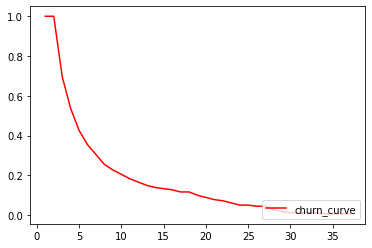

In [79]:
import matplotlib.pyplot as plt
plt.plot(churn_count['length'],churn_count['churn_rate'],color='red',label='churn_curve')
plt.legend(loc='lower right')
plt.show()

# Calculate transactional Feature, Schedule service, Service feature

In [86]:
transaction = pd.read_csv('https://raw.githubusercontent.com/chriszhangpodo/discretizedata/main/customer_churn/transactions.csv')
transaction['trans_date'] = transaction[['Transaction_Processing_Period']].apply(pd.to_datetime)
transaction['trans_m_y'] = transaction['trans_date'].dt.to_period('M')
transaction['SK_Charge'] = transaction['SK_Charge'].fillna(0)
transaction['SK_Charge'] = transaction['SK_Charge'].astype('int')
scheduled_service['SK_Charge'] = scheduled_service['SK_Charge'].astype('int')
sevices['SK_Service'] = sevices['SK_Service'].astype('int')
transaction_process = transaction.merge(scheduled_service,on='SK_Charge',how='left')
transaction_process = transaction_process.merge(sevices,on='SK_Service',how='left')
transaction_process['Transaction_Amount_Negative'] = np.abs(transaction_process['Transaction_Amount_Negative'])
transaction_process['Transaction_Number_Units'] = np.abs(transaction_process['Transaction_Number_Units'])
transaction_process['Transaction_Volume'] = np.abs(transaction_process['Transaction_Volume'])
transaction_process['Transaction_Total_Weight'] = np.abs(transaction_process['Transaction_Total_Weight'])
transaction_process = transaction_process[transaction_process['SK_Service']!=83903]

In [87]:
transaction_process_sevices = pd.get_dummies(transaction_process[['Service_Code_Unit_of_Measure','Service_Lift_Type','Service_Waste_Stream','Activity_Name']],dtype='int')
transaction_process = pd.concat([transaction_process,transaction_process_sevices],axis=1)

In [88]:
# only use the transaction info before the customer churn
transaction_process_churned = transaction_process[transaction_process['SK_Customer'].isin(np.unique(churned_customer['SK_Customer'],return_counts=False))].merge(transaction_churn,left_on='SK_Customer',right_on='SK_Customer',how='left')
transaction_process_churned = transaction_process_churned[transaction_process_churned['trans_m_y']<transaction_process_churned['trans_m_y_y']]

In [89]:
transaction_process_retained = transaction_process[transaction_process['SK_Customer'].isin(np.unique(retained_customer['SK_Customer'],return_counts=False))]

In [90]:
from operator import attrgetter
def get_summary_data(final_sales_input):
    print("Preparing summary data....", dt.datetime.today())
    summary_data = final_sales_input.groupby("SK_Customer").agg(
        {
            "trans_m_y": lambda x: x.tolist(),
            "Transaction_ID": lambda x: len(x.tolist()),
            "SK_Charge": lambda x: len(x.tolist()),
            "Transaction_Number_Units": sum,
            "Transaction_Amount_Positive": sum,
            "Transaction_Amount_Negative": sum,
            "Transaction_Volume": sum,
            "Transaction_Total_Weight": sum,
            "Price": sum,
            'Service_Code_Unit_of_Measure_ADJ': sum, 
            'Service_Code_Unit_of_Measure_EA': sum,
            'Service_Code_Unit_of_Measure_HR': sum, 
            'Service_Code_Unit_of_Measure_KG': sum,
            'Service_Code_Unit_of_Measure_KLT': sum,
            'Service_Code_Unit_of_Measure_LTR': sum,
            'Service_Code_Unit_of_Measure_M3': sum,
            'Service_Code_Unit_of_Measure_TON': sum,
            'Service_Lift_Type_Front Lift': sum, 
            'Service_Lift_Type_RORO': sum,
            'Service_Lift_Type_Rear Lift': sum, 
            'Service_Waste_Stream_Co-Mingle': sum,
            'Service_Waste_Stream_General Waste': sum, 
            'Service_Waste_Stream_Organic': sum,
            'Service_Waste_Stream_Recycling': sum, 
            'Activity_Name_C&I': sum,
            'Activity_Name_Liquid': sum, 
            'Activity_Name_Rebate': sum,
            'Activity_Name_Sale of Other': sum


        }
    )

    # Change units to int64 to keep memory in check
    # summary_data['units']=summary_data.units #.astype('int64')

    # Find the distinct weeks and months, based date key
  
    summary_data["month_count"] = summary_data.trans_m_y.apply(
        lambda x: len(set([element for element in x]))
    )
    summary_data[
        "recency"
    ] = (final_sales_input.trans_m_y.max() - summary_data.trans_m_y.apply(max)).apply(attrgetter('n'))

    # Rename the columns
    summary_data.rename(
        columns={
            "Transaction_ID": "count_transaction",
            "Transaction_Number_Units": "count_items",
            "SK_Charge": "schedule_service",
            "Transaction_Amount_Positive": "total_spend",
            "Transaction_Amount_Negative": "total_credit",
            "Transaction_Volume": "total_vol",
            "Transaction_Total_Weight": "total_weight",
            "Price": "scheduled_price",
        },
        inplace=True,
    )

    ## the sum of new product is based on if the transaction line has a new item (regardless how many were purchased, so new = 1 not new =0)
    ## the sum of all new divided by the total unique count of items determine
    summary_data["weight_per_unit"] = (
        summary_data.total_weight / summary_data.count_items
    )

    #summary_data.pct_new_product.fillna(0, inplace=True)

    # this is to count the frequency based on the total duration of the database (not by customer)
    # due to if the customer only joined for a month and only made one transaction, it would be premature to say they shop
    # on average once a month, so to take a more conservative approach, we will calculate frequency based on the total duration

    summary_data["Frequency_per_month"] = (
        summary_data["count_transaction"] / summary_data["month_count"].nunique()
    )
    summary_data["Spend_per_month"] = (
        summary_data["total_spend"] / summary_data["month_count"].nunique()
    )

    summary_data["ATV"] = (
        summary_data["total_spend"] / summary_data["count_transaction"]
    )
    summary_data["UPT"] = (
        summary_data["count_items"] / summary_data["count_transaction"]
    )
    summary_data["ASP"] = summary_data["total_spend"] / summary_data["count_items"]

    summary_data["AWT"] = summary_data["total_weight"] / summary_data["count_transaction"]
    summary_data["AVT"] = summary_data["total_vol"] / summary_data["count_transaction"]
    # summary_data[summary_data.total_units == 0].head()
    summary_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    summary_data.count_transaction.fillna(0, inplace=True)

    summary_data["total_spend"] = summary_data.total_spend.astype("int64")
    summary_data["total_credit"] = summary_data.total_credit.astype("int64")

    # replace all inf values with nan - customer purchased then return causing net units zero
    summary_data.replace([np.inf, -np.inf], np.nan, inplace=True)

    summary_data.ASP.fillna(0, inplace=True)
    print("Finish summary data....", dt.datetime.today())

    return summary_data

In [91]:
transaction_process_churned_ = get_summary_data(final_sales_input = transaction_process_churned)

transaction_process_retained_ = get_summary_data(final_sales_input = transaction_process_retained)

Preparing summary data.... 2021-11-23 15:10:03.650705
Finish summary data.... 2021-11-23 15:10:03.756409
Preparing summary data.... 2021-11-23 15:10:03.756763
Finish summary data.... 2021-11-23 15:10:04.638340


In [92]:
transaction_process_churned_.to_csv('transaction_process_churned_.csv')
transaction_process_retained_.to_csv('transaction_process_retained_.csv')

# Process Customer Feature to Obtain the full data

In [94]:
customer_=customer[['SK_Customer','WPF_Flag', 'LPF_Flag', 'OCF_Flag', 'PIF_Flag',
       'Lead_Source', 'Payment_Terms', 'EVF_Flag', 'Weekend_Surcharge_Flag',
       'Banding', 'Billing_Cycle','Billing_Address_State', 'Account_Status',
       'Account_Type','Paper_Invoice_Billing_Cycle_Flag','Sub_Banding','Uprate_Category','ANZSIC_Division','Is_Contracted', 'Is_NewBusiness']]

In [95]:
customer_=customer_.set_index('SK_Customer',drop=True)

In [96]:
customer_demo = pd.get_dummies(customer_,dummy_na=True)

In [97]:
len(np.unique(transaction['SK_Customer'],return_counts=False))

884

In [98]:
customer_demo = customer_demo.fillna(0)

In [99]:
full_feature_churn = transaction_process_churned_.join(customer_demo,how='left').drop(['trans_m_y'],axis=1)
full_feature_retain = transaction_process_retained_.join(customer_demo,how='left').drop(['trans_m_y'],axis=1)

In [100]:
full_feature_churn['churn_flag'] = 1
full_feature_retain['churn_flag'] = 0
full_data = pd.concat([full_feature_churn,full_feature_retain],axis=0)
full_data.shape

(884, 266)

In [101]:
full_data.to_csv('all_churn_customer.csv')